# Exploration of Violent Incidents In Bangladesh

>We are going to perform an explorative analysis of violent incidents in Bangladesh using BPO database

**Now let's start.....!!!**

In [270]:
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np
#pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
import pandas as pd



In [271]:
#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import matplotlib as mpl
import matplotlib.pyplot as plt # For base plotting

In [272]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns # Easier plotting



In [273]:
# Misc
import os

In [274]:
## To Show graphs in same window
%matplotlib inline

In [275]:
# Setting up Matplotlib, Seaborn map styles
mpl.style.use("seaborn")
plt.style.use("seaborn")

btui = [
    "#b2182b", "#d6604d", "#f4a582", "#92c5de", "#4393c3", "#2166ac", "#762a83",
    "#9970ab", "#c2a5cf", "#a6dba0", "#5aae61", "#1b7837", "#c51b7d", "#de77ae",
    "#f1b6da", "#8c510a", "#bf812d", "#dfc27d", "#80cdc1", "#35978f", "#01665e",
    ]
import random
btui_reversed = btui[::-1]
btui_shuffled=random.sample(btui, len(btui))

#sns.set(context="notebook", style="darkgrid", font="monospace", font_scale=1.5, palette=btui)
sns.color_palette(btui)
sns.set_palette(btui)
sns.set(rc={"figure.figsize": (14, 10)})

In [276]:
# Read file
incidents = pd.read_csv("incident-raw-data1.csv")

In [277]:
# Explore data - First 5 records 
incidents.head()                          # head()

,incident_id,eventdate,eventsource,division,district,upazilla,union,viol,vdir,viotypeone,...,injtotal,injfetotal,sexasstotal,sexassfetotal,abdtotal,arresttotal,damageproperty,intervention,eventdesc,eventurl
0,3,07/09/2001,The Daily Bangladesh Observer,Chittagong,Comilla Zila,Muradnagar Upazila,,Y,1.0,Assault,...,1,,,,,,NaN,NaN,Candidate of Comilla-3 of Islami Satantra part...,NaN
1,5,09/09/2001,The Daily Bangladesh Observer,Dhaka,Dhaka Zila,Shahbagh Thana,,Y,2.0,Clash,...,1,,,,,,NaN,NaN,Jatiyotabadi Chhatrodal leader beaten up becau...,NaN
2,9,09/09/2001,The Daily Bangladesh Observer,Chittagong,Brahmanbaria Zila,Nabinagar Upazila,Barikandi Union,Y,1.0,Assault,...,1,,,,,,NaN,NaN,A candidate of four party alliance injured by ...,NaN
3,17,10/09/2001,The Daily Jugantar,Chittagong,Noakhali Zila,Begumganj Upazila,,Y,1.0,Assault,...,1,,,,,,"[{""name"":""shop"",""keyvalue"":1,""incident"":""5ac5b...",Police and administration,One man was injured and one shop was damaged i...,NaN
4,99,16/09/2001,The Daily Bangladesh Observer,Mymensingh,Mymensingh Zila,Mymensingh Sadar Upazila,,Y,1.0,Assault,...,1,,,,,,NaN,Police controlled the situation.,A Jatiyotabadi Chhatro Dal leader stabbed.,NaN


In [278]:
incidents.columns

Index(['incident_id', 'eventdate', 'eventsource', 'division', 'district',
       'upazilla', 'union', 'viol', 'vdir', 'viotypeone', 'viotypetwo',
       'weaptypeone', 'weaptypetwo', 'mtvincidentone', 'mtvincidenttwo',
       'crosscutting', 'perpgroup', 'targgroup', 'actorone', 'actortwo',
       'actorone_killed', 'actorone_injured', 'actortwo_killed',
       'actortwo_injured', 'kiltotal', 'kilfetotal', 'injtotal', 'injfetotal',
       'sexasstotal', 'sexassfetotal', 'abdtotal', 'arresttotal',
       'damageproperty', 'intervention', 'eventdesc', 'eventurl'],
      dtype='object')

In [279]:
incidents.columns.values

array(['incident_id', 'eventdate', 'eventsource', 'division', 'district',
       'upazilla', 'union', 'viol', 'vdir', 'viotypeone', 'viotypetwo',
       'weaptypeone', 'weaptypetwo', 'mtvincidentone', 'mtvincidenttwo',
       'crosscutting', 'perpgroup', 'targgroup', 'actorone', 'actortwo',
       'actorone_killed', 'actorone_injured', 'actortwo_killed',
       'actortwo_injured', 'kiltotal', 'kilfetotal', 'injtotal',
       'injfetotal', 'sexasstotal', 'sexassfetotal', 'abdtotal',
       'arresttotal', 'damageproperty', 'intervention', 'eventdesc',
       'eventurl'], dtype=object)

In [280]:
incidents.values

array([[3, '07/09/2001', 'The Daily Bangladesh Observer ', ..., nan,
        'Candidate of Comilla-3 of Islami Satantra party assaulted by Bangladesh Chhatroleague activist.',
        nan],
       [5, '09/09/2001', 'The Daily Bangladesh Observer ', ..., nan,
        'Jatiyotabadi Chhatrodal leader beaten up because of intra-party conflict.',
        nan],
       [9, '09/09/2001', 'The Daily Bangladesh Observer ', ..., nan,
        "A candidate of four party alliance injured by the attack of Bangladesh Nationalist Party activist who didn't get nomination. ",
        nan],
       ...,
       [5237, '27/12/2015', 'Daily-Star', ...,
        'Police intervenes during the violent event ', nan, nan],
       [204, '21/09/2001', 'The Daily Bangladesh Observer ', ..., nan,
        '20 killed and 300 injured in a clash between Awami league and Bangladesh Nationalist Party.',
        nan],
       [6378, '02/07/2016', 'Ittefaq', ..., nan,
        'Bloody hostage crisis of Holey Artisan Bakery ended

In [281]:
incidents.dtypes

incident_id           int64
eventdate            object
eventsource          object
division             object
district             object
upazilla             object
union                object
viol                 object
vdir                float64
viotypeone           object
viotypetwo           object
weaptypeone          object
weaptypetwo          object
mtvincidentone       object
mtvincidenttwo       object
crosscutting         object
perpgroup            object
targgroup            object
actorone             object
actortwo             object
actorone_killed       int64
actorone_injured      int64
actortwo_killed       int64
actortwo_injured      int64
kiltotal              int64
kilfetotal           object
injtotal              int64
injfetotal           object
sexasstotal          object
sexassfetotal        object
abdtotal             object
arresttotal          object
damageproperty       object
intervention         object
eventdesc            object
eventurl            

In [282]:
incidents.describe()

,incident_id,vdir,actorone_killed,actorone_injured,actortwo_killed,actortwo_injured,kiltotal,injtotal
count,37188.000000,18247.000000,37188.000000,37188.000000,37188.000000,37188.000000,37188.00000,37188.000000
mean,18594.500000,1.229134,0.004168,0.116677,0.126976,0.309966,0.29972,2.133833
std,10735.395242,0.420287,0.200997,1.468804,0.461798,2.541378,0.58750,9.933139
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9297.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,18594.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,27891.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,37188.000000,2.000000,33.000000,150.000000,32.000000,140.000000,28.00000,760.000000


In [283]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37188 entries, 0 to 37187
Data columns (total 36 columns):
incident_id         37188 non-null int64
eventdate           37188 non-null object
eventsource         37188 non-null object
division            37188 non-null object
district            37188 non-null object
upazilla            37188 non-null object
union               36870 non-null object
viol                32792 non-null object
vdir                18247 non-null float64
viotypeone          36014 non-null object
viotypetwo          37000 non-null object
weaptypeone         37188 non-null object
weaptypetwo         37188 non-null object
mtvincidentone      37188 non-null object
mtvincidenttwo      37188 non-null object
crosscutting        37188 non-null object
perpgroup           37166 non-null object
targgroup           37181 non-null object
actorone            37188 non-null object
actortwo            37185 non-null object
actorone_killed     37188 non-null int64
actorone_i

In [284]:
incidents.shape

(37188, 36)

In [285]:
# using isnull to find out missing values
incidents.isnull().values.any()


True

In [286]:
incidents.isnull().sum()


incident_id             0
eventdate               0
eventsource             0
division                0
district                0
upazilla                0
union                 318
viol                 4396
vdir                18941
viotypeone           1174
viotypetwo            188
weaptypeone             0
weaptypetwo             0
mtvincidentone          0
mtvincidenttwo          0
crosscutting            0
perpgroup              22
targgroup               7
actorone                0
actortwo                3
actorone_killed         0
actorone_injured        0
actortwo_killed         0
actortwo_injured        0
kiltotal                0
kilfetotal              0
injtotal                0
injfetotal              0
sexasstotal             0
sexassfetotal           0
abdtotal                0
arresttotal             0
damageproperty      33816
intervention        30496
eventdesc            4400
eventurl             5348
dtype: int64

In [287]:
# using isna to find out missing values

In [288]:
incidents.isna().values.any()

True

In [289]:
sum_missing_data=incidents.isna().sum()
sum_missing_data

incident_id             0
eventdate               0
eventsource             0
division                0
district                0
upazilla                0
union                 318
viol                 4396
vdir                18941
viotypeone           1174
viotypetwo            188
weaptypeone             0
weaptypetwo             0
mtvincidentone          0
mtvincidenttwo          0
crosscutting            0
perpgroup              22
targgroup               7
actorone                0
actortwo                3
actorone_killed         0
actorone_injured        0
actortwo_killed         0
actortwo_injured        0
kiltotal                0
kilfetotal              0
injtotal                0
injfetotal              0
sexasstotal             0
sexassfetotal           0
abdtotal                0
arresttotal             0
damageproperty      33816
intervention        30496
eventdesc            4400
eventurl             5348
dtype: int64

In [290]:
count_missing_data=incidents.isna().count()
count_missing_data

incident_id         37188
eventdate           37188
eventsource         37188
division            37188
district            37188
upazilla            37188
union               37188
viol                37188
vdir                37188
viotypeone          37188
viotypetwo          37188
weaptypeone         37188
weaptypetwo         37188
mtvincidentone      37188
mtvincidenttwo      37188
crosscutting        37188
perpgroup           37188
targgroup           37188
actorone            37188
actortwo            37188
actorone_killed     37188
actorone_injured    37188
actortwo_killed     37188
actortwo_injured    37188
kiltotal            37188
kilfetotal          37188
injtotal            37188
injfetotal          37188
sexasstotal         37188
sexassfetotal       37188
abdtotal            37188
arresttotal         37188
damageproperty      37188
intervention        37188
eventdesc           37188
eventurl            37188
dtype: int64

In [291]:
percentage_missing_data=(sum_missing_data/count_missing_data) * 100
percentage_missing_data

incident_id          0.000000
eventdate            0.000000
eventsource          0.000000
division             0.000000
district             0.000000
upazilla             0.000000
union                0.855115
viol                11.821018
vdir                50.933097
viotypeone           3.156932
viotypetwo           0.505539
weaptypeone          0.000000
weaptypetwo          0.000000
mtvincidentone       0.000000
mtvincidenttwo       0.000000
crosscutting         0.000000
perpgroup            0.059159
targgroup            0.018823
actorone             0.000000
actortwo             0.008067
actorone_killed      0.000000
actorone_injured     0.000000
actortwo_killed      0.000000
actortwo_injured     0.000000
kiltotal             0.000000
kilfetotal           0.000000
injtotal             0.000000
injfetotal           0.000000
sexasstotal          0.000000
sexassfetotal        0.000000
abdtotal             0.000000
arresttotal          0.000000
damageproperty      90.932559
interventi

In [292]:
missing_data = pd.concat([sum_missing_data, percentage_missing_data], axis=1)
missing_data


,0,1
incident_id,0,0.000000
eventdate,0,0.000000
eventsource,0,0.000000
division,0,0.000000
district,0,0.000000
upazilla,0,0.000000
union,318,0.855115
viol,4396,11.821018
vdir,18941,50.933097
viotypeone,1174,3.156932


In [293]:
del(sum_missing_data,count_missing_data,percentage_missing_data)

In [294]:
from matplotlib import collections as collections
from matplotlib.patches import Rectangle


In [295]:
#To install this package with conda run:
#conda install -c auto more-itertools 

#from itertools import izip as zip  #throwing error

import itertools
zip = getattr(itertools, 'izip', zip)
from itertools import cycle

**APPLYING FEATURE ENGINEERING ON THE INCIDENT DATASET**

In [296]:
#Converting object datatype to datetime
incidents["eventdate"] = pd.to_datetime(incidents["eventdate"])

In [297]:
incidents["day"] = incidents["eventdate"].dt.day
incidents["month"] = incidents["eventdate"].dt.month
incidents["year"] = incidents["eventdate"].dt.year
incidents["weekday"] = incidents["eventdate"].dt.weekday
incidents["week"] = incidents["eventdate"].dt.week
incidents["quarter"] = incidents["eventdate"].dt.quarter

In [298]:
#Check the datatype of columns now
incidents.dtypes

incident_id                  int64
eventdate           datetime64[ns]
eventsource                 object
division                    object
district                    object
upazilla                    object
union                       object
viol                        object
vdir                       float64
viotypeone                  object
viotypetwo                  object
weaptypeone                 object
weaptypetwo                 object
mtvincidentone              object
mtvincidenttwo              object
crosscutting                object
perpgroup                   object
targgroup                   object
actorone                    object
actortwo                    object
actorone_killed              int64
actorone_injured             int64
actortwo_killed              int64
actortwo_injured             int64
kiltotal                     int64
kilfetotal                  object
injtotal                     int64
injfetotal                  object
sexasstotal         

In [299]:
incidents["viotypeone"].unique()              #which values

array(['Assault', 'Clash', 'Unclear', ' ', nan, 'Destruction of property',
       'Other', 'Abduction/hostage', 'Gunfight', 'Sexual assault',
       'Violent demonstration', 'Mob violence (large group assault)',
       'Fight', 'Violence against civilians', 'Remote violence',
       'Cross fire/ encounter', 'Sabotage', 'Terror attack',
       'Unspecified', 'Coup', 'Battle'], dtype=object)

In [300]:
## Created a new column for the total number of persons impacted (injured+killed) as per the data available
incidents["total_impacted"] = incidents["kiltotal"] + incidents["injtotal"]

In [301]:
# Checking values for new columns added
incidents.head()

,incident_id,eventdate,eventsource,division,district,upazilla,union,viol,vdir,viotypeone,...,intervention,eventdesc,eventurl,day,month,year,weekday,week,quarter,total_impacted
0,3,2001-07-09,The Daily Bangladesh Observer,Chittagong,Comilla Zila,Muradnagar Upazila,,Y,1.0,Assault,...,NaN,Candidate of Comilla-3 of Islami Satantra part...,NaN,9,7,2001,0,28,3,1
1,5,2001-09-09,The Daily Bangladesh Observer,Dhaka,Dhaka Zila,Shahbagh Thana,,Y,2.0,Clash,...,NaN,Jatiyotabadi Chhatrodal leader beaten up becau...,NaN,9,9,2001,6,36,3,1
2,9,2001-09-09,The Daily Bangladesh Observer,Chittagong,Brahmanbaria Zila,Nabinagar Upazila,Barikandi Union,Y,1.0,Assault,...,NaN,A candidate of four party alliance injured by ...,NaN,9,9,2001,6,36,3,1
3,17,2001-10-09,The Daily Jugantar,Chittagong,Noakhali Zila,Begumganj Upazila,,Y,1.0,Assault,...,Police and administration,One man was injured and one shop was damaged i...,NaN,9,10,2001,1,41,4,1
4,99,2001-09-16,The Daily Bangladesh Observer,Mymensingh,Mymensingh Zila,Mymensingh Sadar Upazila,,Y,1.0,Assault,...,Police controlled the situation.,A Jatiyotabadi Chhatro Dal leader stabbed.,NaN,16,9,2001,6,37,3,1


In [302]:
# Checking the dimensions
incidents.shape

(37188, 43)

**DATA EXPLORATION WITH THE HELP OF GRAPHS**

**The following graphs have been used to describe the iincident data :**
* **    i)      Joint Distribution plots**
* **    ii)     Histograms**
* **    iii)    Pie chart**
* **    iv)    Kernel Density plots**
* **    v)     Point plots**
* **    vi)    Violin plots**
* **    vii)   Box plots**
* **    viii)  Count plots**
* **    ix)    Facet Grid plots**

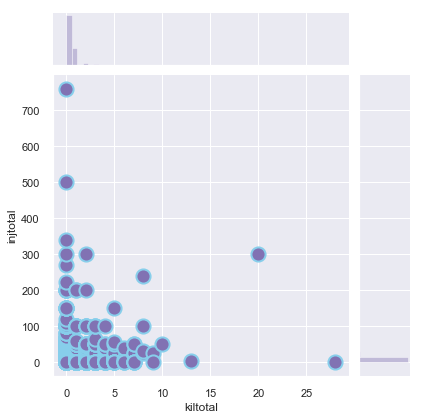

In [303]:
# Jointplot between Number of Person Killed Vs Injured in all incidences
sns.jointplot("kiltotal",
              "injtotal",
              incidents,
              kind='scatter',      # kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
              s=200, color='m', edgecolor="skyblue", linewidth=2)

> Notice from above chart that incidents having lower number of injuries have more number number of killings

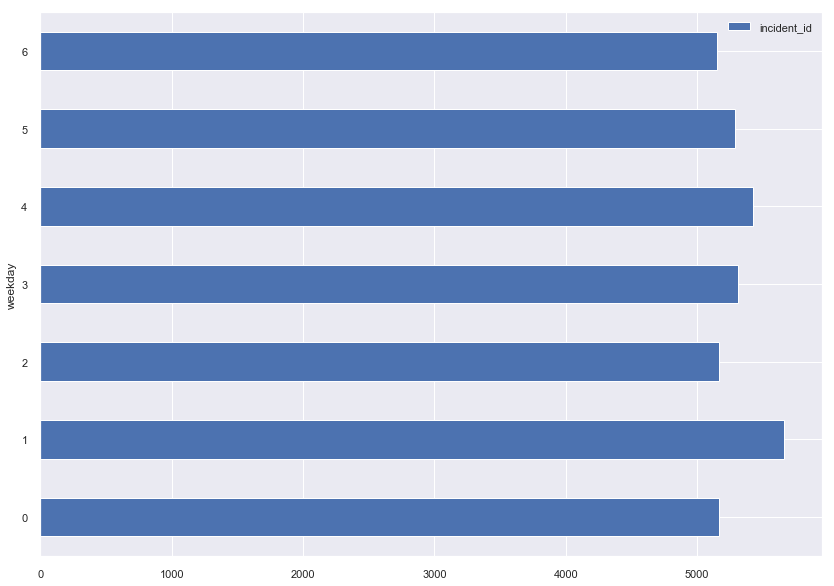

In [304]:
# Histogram for Weekday wise Incidents
weekwise_total = incidents[["incident_id"]].groupby(incidents["weekday"]).count()
weekwise_total.plot.barh()
del(weekwise_total)
# Here, for weekdays 0 is for Monday and 6 is for Sunday.

> The charts above shows that TUESDAY has the highest frequency of incidents from 2001 to 2019. Although the chart below shows that, on an average, Most incidents occur on MONDAYS and SATURDAYS of the week. We may need to find out why this is the case

In [305]:
tempdf1 = incidents.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count' : 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order = list(weekmap.values())
ordervals = [wkmp[val] for val in order]

trace1 = go.Bar(x=order, y=ordervals, opacity=0.75, name="weekday", marker=dict(color='rgba(61, 60, 250, 0.6)'))
layout = dict(height=400, title='Average number of Incidents by Day of the Week', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

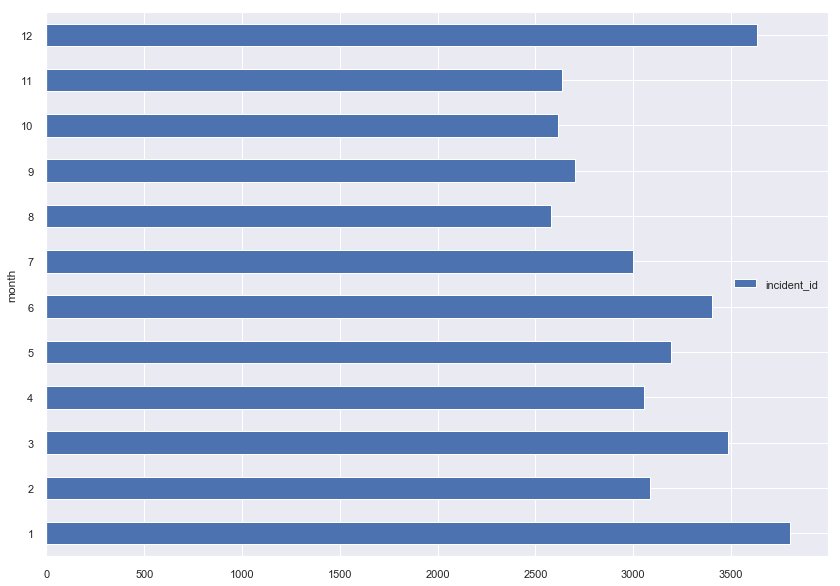

In [306]:
# Histogram for Month wise Incidents
monthwise_total = incidents[["incident_id"]].groupby(incidents["month"]).count()
monthwise_total.plot.barh()
del(monthwise_total)
# Here, for months 1 is for January and 12 is for December.

> The charts above and below shows that the most incidents occur in JANUARY

In [307]:
import calendar
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
tempdf = incidents[incidents['year'].isin(['2013','2014','2015','2016','2017','2018','2019'])]
tempdf1 = tempdf.groupby(['year','month']).agg({'month' : 'count'}).rename(columns={'month': 'month_count'}).reset_index()
aggregated = tempdf1.groupby(['month']).agg({'month_count' : 'mean'})
x2 = aggregated.index.tolist()
y2 = aggregated.month_count.tolist()
mapp = {}
for m,v in zip(x2, y2):
    mapp[m] = v
xn = [calendar.month_abbr[int(x)] for x in sorted(x2)]
vn = [mapp[x] for x in sorted(x2)]

trace1 = go.Bar(x=xn, y=vn, opacity=0.75, name="month", marker=dict(color='rgba(100, 20, 10, 0.6)'))
layout = dict(height=400, title='Average number of Incidents by Months from 2013 to 2019', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

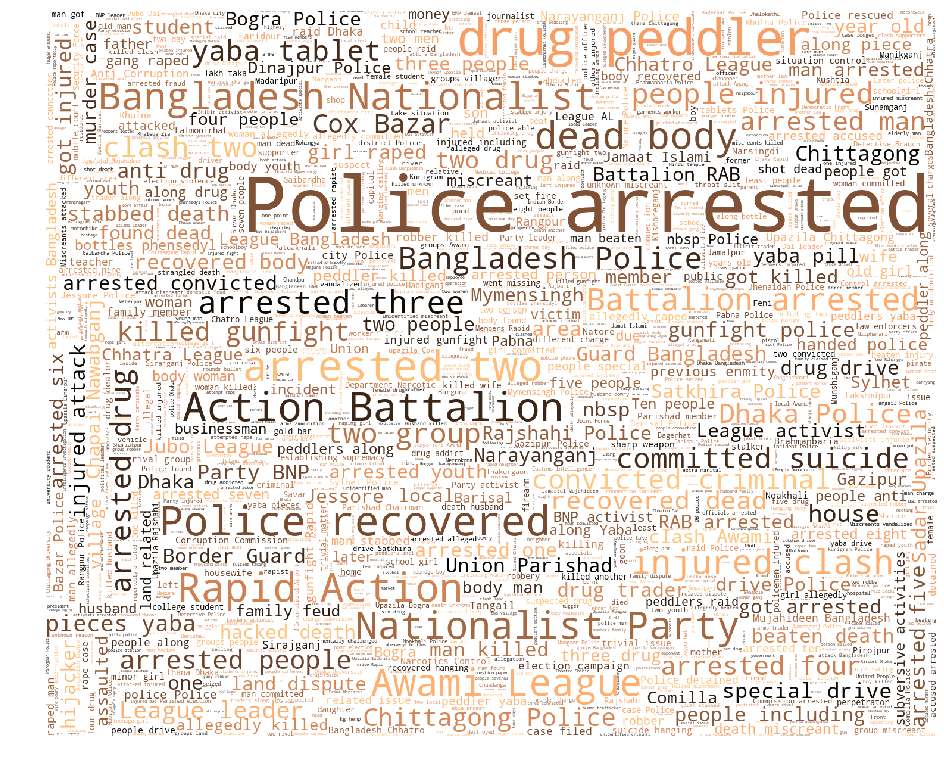

In [308]:
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS
mask = np.array(Image.open('violence.jpg'))
txt = " ".join(incidents['eventdesc'].dropna())
wc = WordCloud(mask=mask, max_words=1200, stopwords=STOPWORDS, colormap='copper', background_color='White').generate(txt)
plt.figure(figsize=(16,18))
plt.imshow(wc)
plt.axis('off')
plt.title('');

> The above word cloud depicts that most number of incidents are reported involve POLICE ARREST, DRUG PEDDLEERS AND BANGLADESH NATIONALISTS. 

Text(0.5, 1.0, 'Top 10 Divisions having high incident rate')

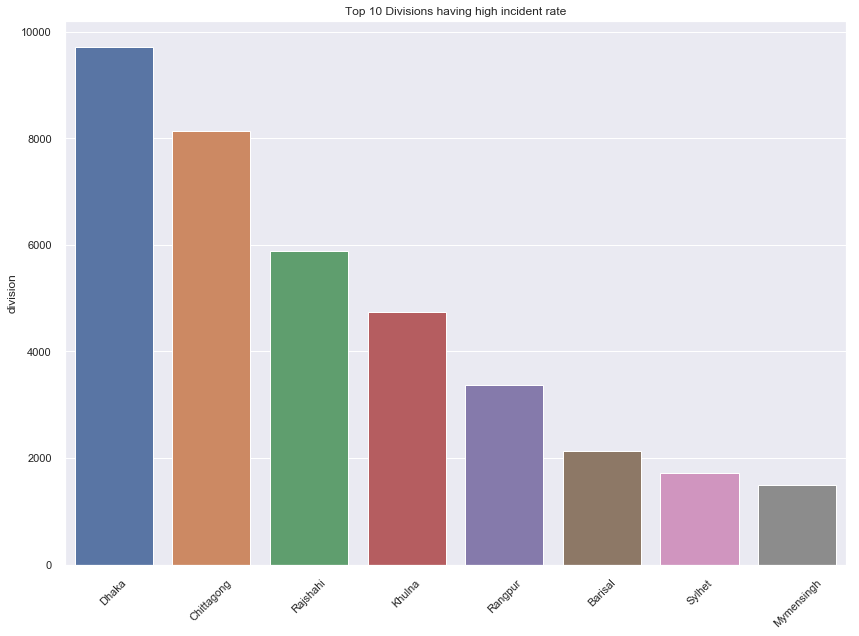

In [309]:
# Histogram showing the the top 10 cities with high crime rate
city_vs_crimerate=incidents['division'].value_counts().head(10)
city_vs_crimerate=sns.barplot(x=city_vs_crimerate.index,y=city_vs_crimerate)
city_vs_crimerate.set_xticklabels(city_vs_crimerate.get_xticklabels(),rotation=45)
city_vs_crimerate.set_title("Top 10 Divisions having high incident rate")

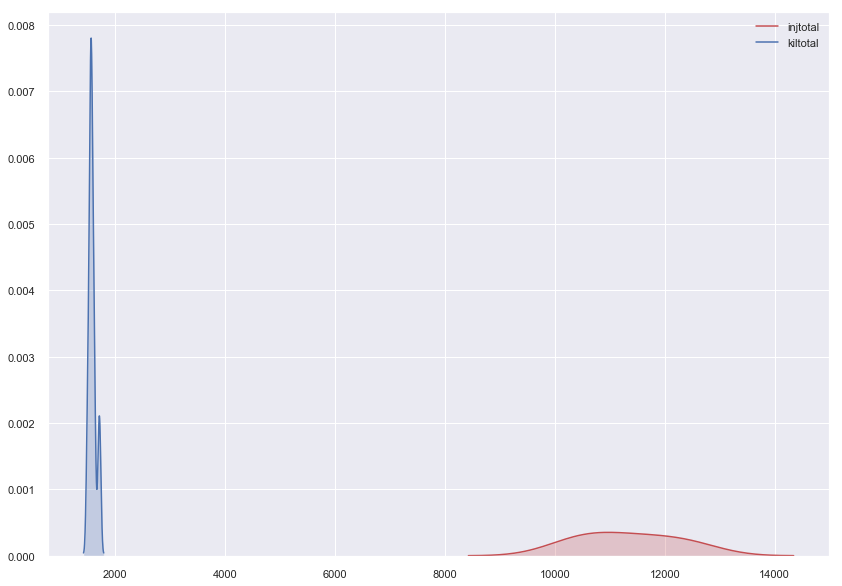

In [310]:
# Density plot for person injured vs killed on all weekdays
inj_kill_weektotal = incidents[["injtotal","kiltotal"]].groupby(incidents["weekday"]).sum()
dp_inj_kill_plot=sns.kdeplot(inj_kill_weektotal['injtotal'], shade=True, color="r")
dp_inj_kill_plot=sns.kdeplot(inj_kill_weektotal['kiltotal'], shade=True, color="b")
del(inj_kill_weektotal)

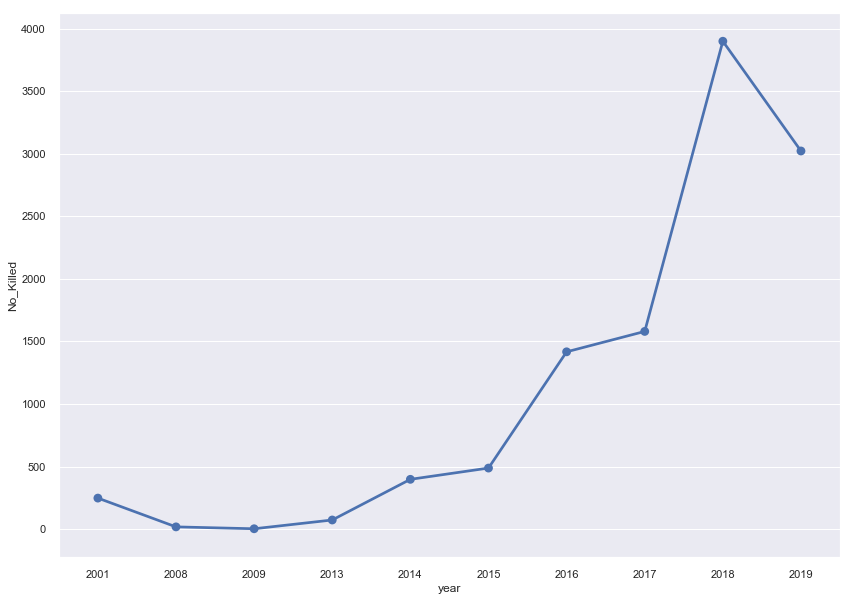

In [311]:
# Point plot showing yearly no of persons Killed 
yearly_vs_killed=incidents.groupby(incidents["year"]).apply(lambda x: pd.Series(dict(No_Killed=x.kiltotal.sum())))
yearly_vs_killed_plot=sns.pointplot(x=yearly_vs_killed.index, y=yearly_vs_killed.No_Killed, data=yearly_vs_killed,label="yearly_vs_killed")

## From the chart above, there is a sharp drop in number of persons killed from 2018 to 2019

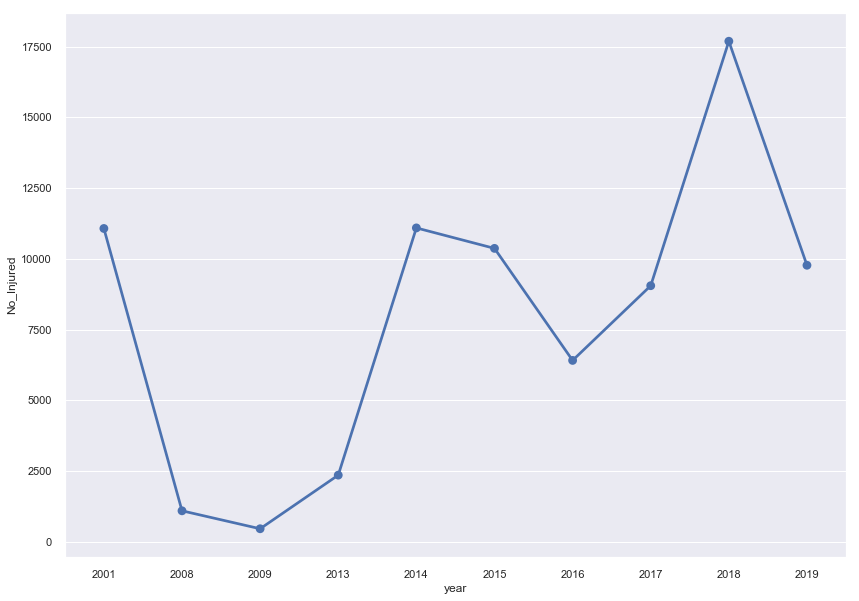

In [312]:
# Point plot showing yearly no of persons Injured
yearly_vs_injured=incidents.groupby(incidents["year"]).apply(lambda x: pd.Series(dict(No_Injured=x.injtotal.sum())))
yearly_vs_injured_plot=sns.pointplot(x=yearly_vs_injured.index, y=yearly_vs_injured.No_Injured, data=yearly_vs_injured,label="yearly_vs_injured")

> From the chart above, there is a sharp drop in number of persons injured between 2008 and 2009, this is likely due to data quality issues

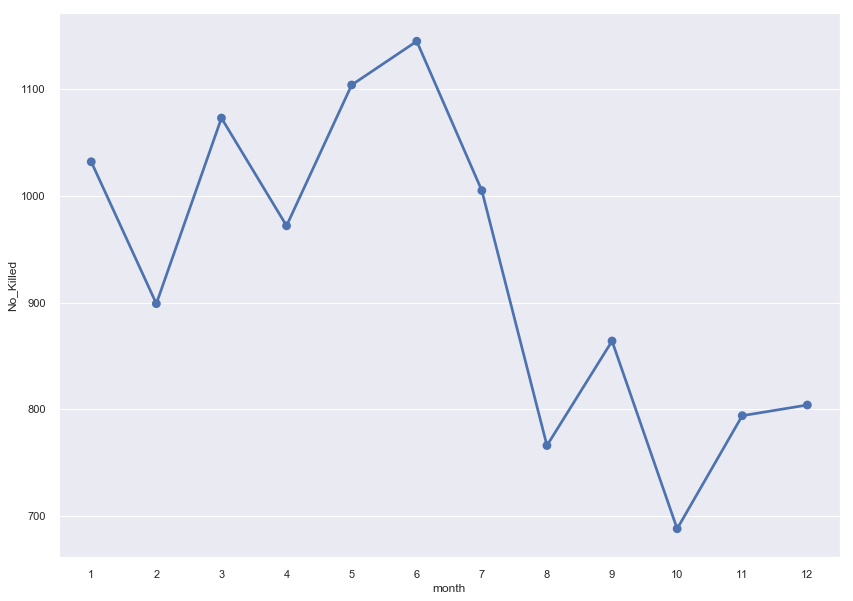

In [313]:
# Point plot showing monthly no of people Killed 
monthly_vs_killed=incidents.groupby(incidents["month"]).apply(lambda x: pd.Series(dict(No_Killed=x.kiltotal.sum())))
monthly_vs_killed_plot=sns.pointplot(x=monthly_vs_killed.index, y=monthly_vs_killed.No_Killed, data=monthly_vs_killed,label="monthly_vs_killed")

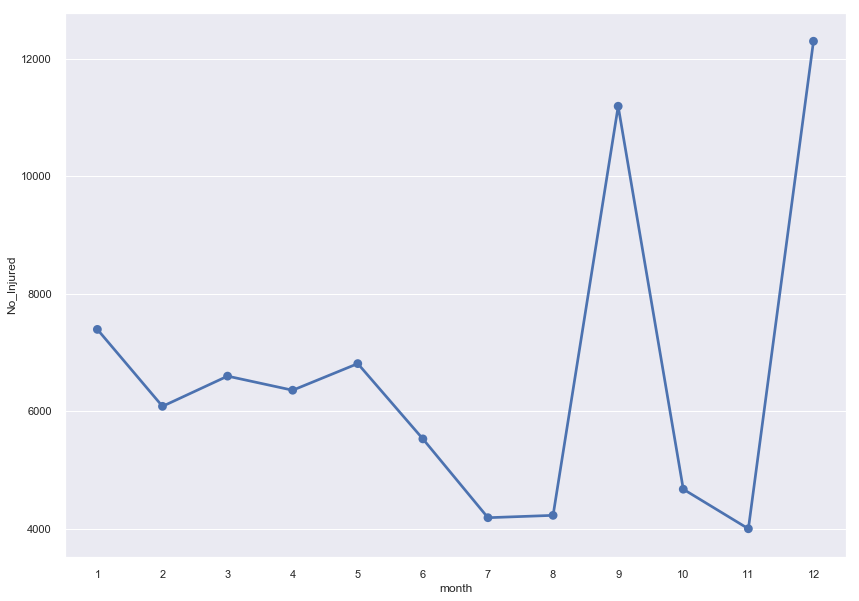

In [314]:
# Point plot showing monthly no of people injured
monthly_vs_injured=incidents.groupby(incidents["month"]).apply(lambda x: pd.Series(dict(No_Injured=x.injtotal.sum())))
monthly_vs_injured_plot=sns.pointplot(x=monthly_vs_injured.index, y=monthly_vs_injured.No_Injured, data=monthly_vs_injured,label="monthly_vs_injured")

Text(0.5, 1.0, 'Persons injured in the incidents per Year')

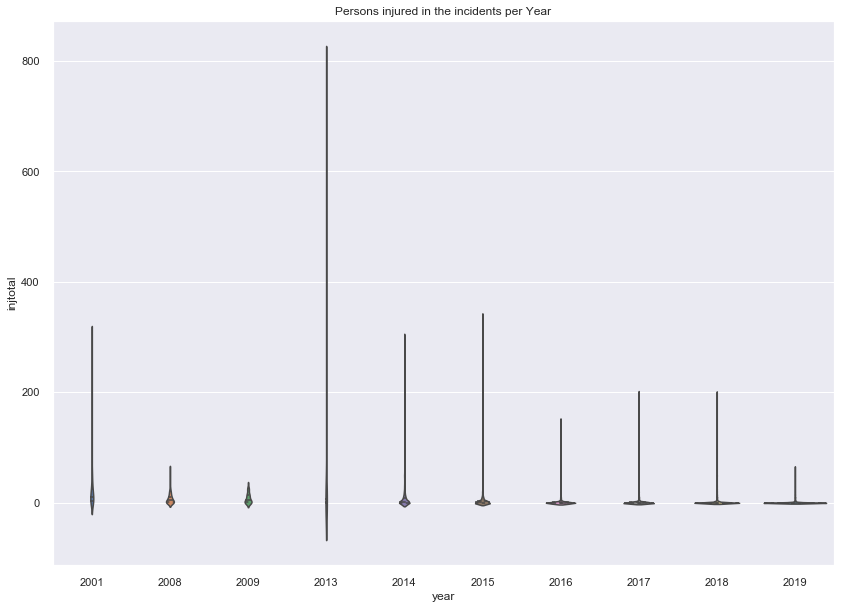

In [315]:
# Violin Plot for Year wise no of people injured
year_vs_injured_plot = sns.violinplot("year", "injtotal", data=incidents,split=True, inner="quartile")
year_vs_injured_plot.set_title("Persons injured in the incidents per Year")

Text(0.5, 1.0, 'Persons killed in the incidents per Year')

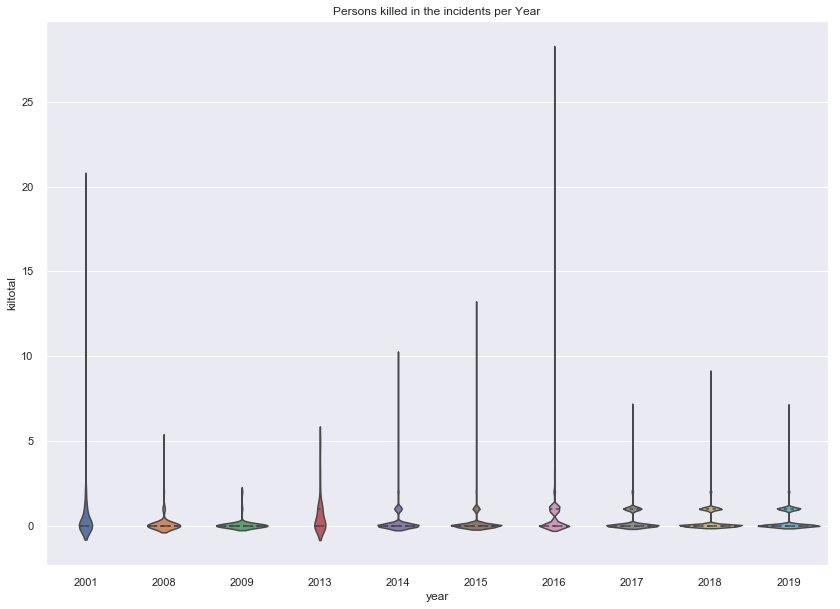

In [316]:
# Violin Plot for Year wise no of people killed
year_vs_killed_plot = sns.violinplot("year", "kiltotal",
               data=incidents,
               split=True,         # If hue variable has two levels, draw half of a violin for each level.
               inner="quartile"    #  Options: “box”, “quartile”, “point”, “stick”, None 
               )
year_vs_killed_plot.set_title("Persons killed in the incidents per Year")

In [317]:
# Violin Plot for total num of persons Impacted(Killed/Injured)
Impacted_persons_total = incidents[["total_impacted", "injtotal", "kiltotal"]].groupby(incidents["year"]).sum()


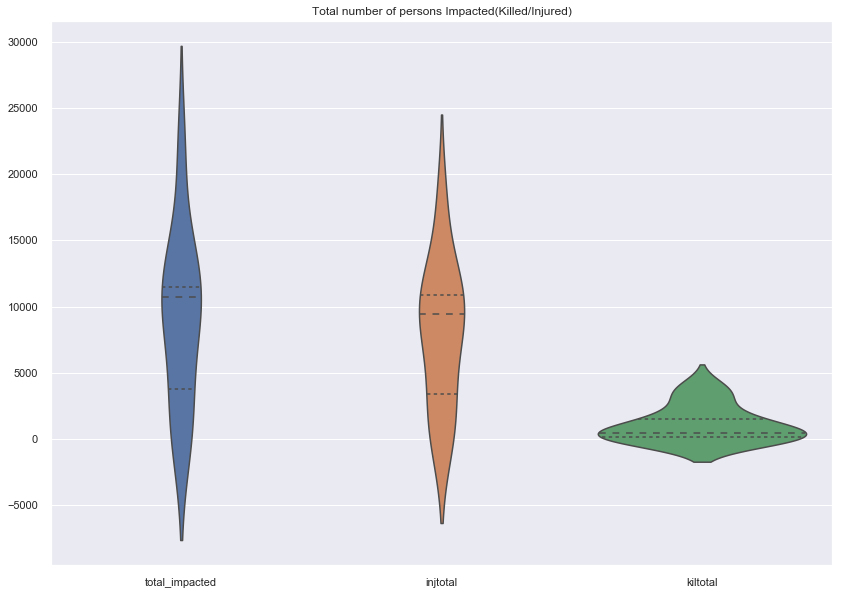

In [318]:
year_impacted_plot = sns.violinplot(data=Impacted_persons_total,
               split=True,         # If hue variable has two levels, draw half of a violin for each level.
               inner="quartile"    #  Options: “box”, “quartile”, “point”, “stick”, None 
               )
year_impacted_plot.set_title("Total number of persons Impacted(Killed/Injured)")
del(Impacted_persons_total)

In [319]:
# State Vs No of People Killed
statewise_vs_killed=incidents.groupby(incidents["district"]).apply(lambda x: pd.Series(dict(No_Killed=x.kiltotal.sum())))

Text(0.5, 1.0, 'Person killed in incidents per month')

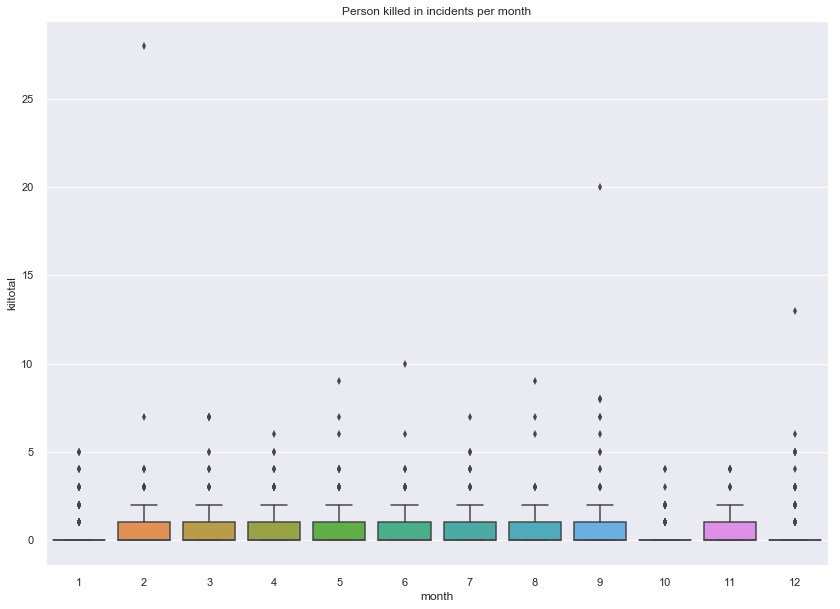

In [320]:
# Box Plot for Monthwise total number of Persons Killed
monthwise_killed_plot = sns.boxplot("month", "kiltotal", data= incidents)
monthwise_killed_plot.set_title("Person killed in incidents per month")

Text(0.5, 1.0, 'Person injured in incidents per month')

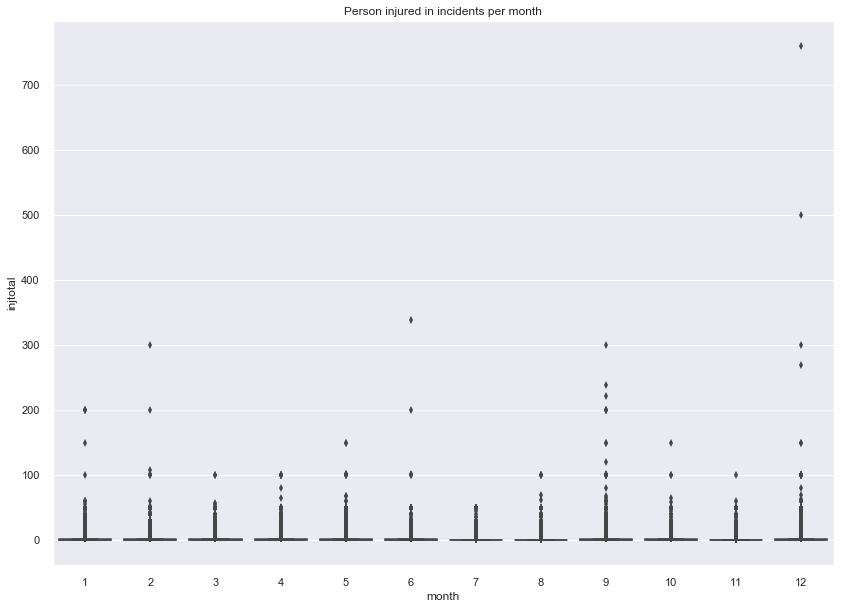

In [321]:
# Box Plot for Monthwise total number of Persons Injured
month_injured_plot = sns.boxplot("month", "injtotal", data= incidents)
month_injured_plot.set_title("Person injured in incidents per month")